In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib.legend_handler import HandlerLine2D
from sklearn.svm import OneClassSVM
import pydot
import os

In [2]:
data = pd.read_csv("spambase.data", delimiter=",", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## CART MODEL

misclassification rate is:  0.13355048859934854


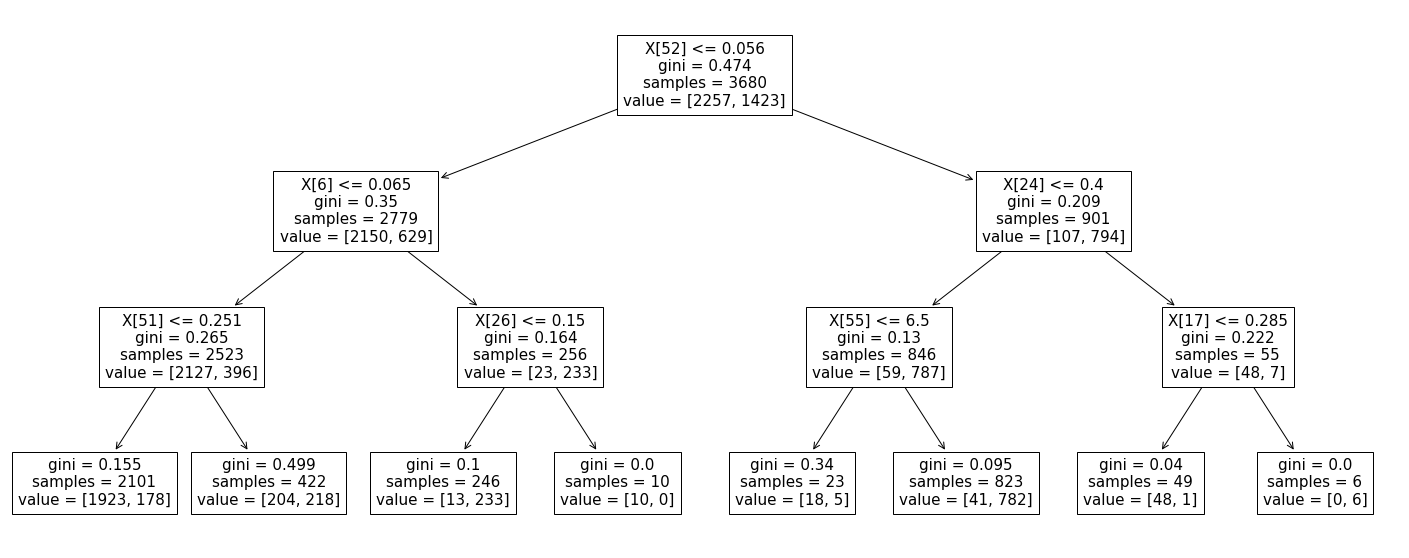

In [11]:
clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_test)
plt.figure(figsize=(25,10))
a = plot_tree(clf)
mse1 = mean_squared_error(y_test, y_pred1)
print ("misclassification rate is: ",str(mse1) )

## RANDOM FOREST MODEL

In [10]:
rf = RandomForestClassifier(n_estimators=10, max_depth=3)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
auc2 = roc_auc_score(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
print ("misclassification rate is: ",str(mse2) )

misclassification rate is:  0.11726384364820847


optimal test error for decision tree is 0.07600434310532031
optimal test error for random forest is 0.04777415852334419


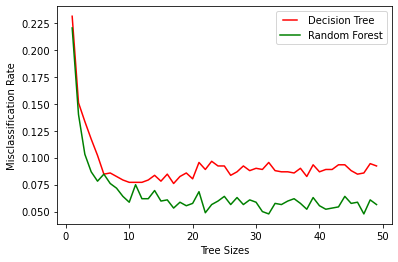

In [6]:
#REFERENCE: https://stackoverflow.com/questions/59678961/how-to-plot-the-error-and-the-tree-size-of-a-random-forest
trees = 50
mse_dtc = []
mse_rfc = []
for i in range(1, trees): 
    rf = RandomForestClassifier(n_estimators=10, max_depth=i)
    rf.fit(X_train, y_train)
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    mse_dtc.append(mean_squared_error(y_test, clf.predict(X_test)))
    mse_rfc.append(mean_squared_error(y_test, rf.predict(X_test)))
print('optimal test error for decision tree is',min(mse_dtc))  
print('optimal test error for random forest is',min(mse_rfc))  
line1, = plt.plot(list(range(1,trees)), mse_dtc, color="r", label='Decision Tree')
line2, = plt.plot(list(range(1,trees)), mse_rfc, color="g", label='Random Forest')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Misclassification Rate')
plt.xlabel('Tree Sizes')
plt.show()   

## SVM

In [7]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state = 42)
X_nonspam = X_train1[y_train1 == 0]

Optimal MSE of One-class SVM: 0.3562635771180304


Text(0, 0.5, 'Misclassification error rate')

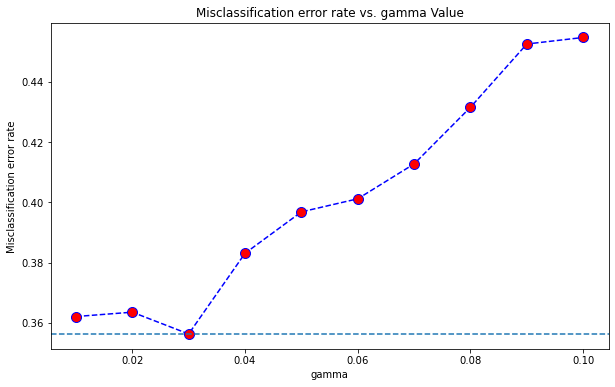

In [18]:
import numpy as np
error = []
for gamma in np.arange(0.01, 0.101, 0.01):
    model = OneClassSVM(kernel='rbf', gamma=gamma).fit(X_nonspam)
    y_test_pred = model.predict(X_test1)
    y_test_pred[y_test_pred == 1] = 0
    y_test_pred[y_test_pred == -1] = 1
    error.append(mean_squared_error(y_test1, y_test_pred))    
print("Optimal MSE of One-class SVM:", min(error))
plt.figure(figsize=(10,6))
plt.plot(np.arange(0.01, 0.101, 0.01), error ,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.axhline(y=min(error), linestyle='--')
plt.title('Misclassification error rate vs. gamma Value')
plt.xlabel('gamma')
plt.ylabel('Misclassification error rate')